## Observations and Insights 

Purpose & Goal:
In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

Observations:
(1) Gender did not play a role in skewing with the data since the female to male ratio is about equal (female=49.4 vs. male=50.6)
(2) Based on the boxplot, Ramicane was the best performing drug regimne  
(3) Based on the linear regression model, there is a positive correlation between the Avg. Volume vs. Weight

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#pd.set_option('display.max_rows', None)

In [31]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [32]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [33]:
#look at the data for mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [34]:
#looking at the data for study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [35]:
# Combine the data into a single dataset
merge_df = pd.merge(
    left=mouse_metadata, 
    right=study_results, 
    on="Mouse ID"
)

In [36]:
#All data before removing duplicates
len(merge_df)

1893

In [37]:
# Checking the number of mice in the DataFrame.
# use set function

num_mice = merge_df['Mouse ID'].unique()
count_num_mice = len(num_mice)
print(count_num_mice)


249


In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
subset_columns = ['Mouse ID', 'Timepoint']
duplicate_mice_series = merge_df.duplicated(subset = subset_columns)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merge_df[duplicate_mice_series]
#duplicate_rows.head()
len(duplicate_rows)

5

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Dropping duplicate rows
non_duplicates = merge_df.drop_duplicates(subset = subset_columns, keep = False)
non_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
#Total rows in the non duplicate dataframe
total_mice_clean = len(non_duplicates)
total_mice_clean

1883

In [42]:
# Checking the number of mice in the clean DataFrame.
number_mice_new = non_duplicates['Mouse ID'].unique()
count_num_mice = len(number_mice_new)
print(count_num_mice)

249


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
col_list = ['Drug Regimen', 'Tumor Volume (mm3)']

merge_new_df = merge_df.loc[:,col_list]

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

merge_dfg = merge_new_df.groupby('Drug Regimen')

merge_summary_df = merge_dfg.agg(['mean','median','var','std','sem'])
merge_summary_df.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar Plots

In [45]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Used the filter from the above dataframe, then used the count function per drug regimen

count_per_regimen = merge_dfg.count()
count_per_regimen

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


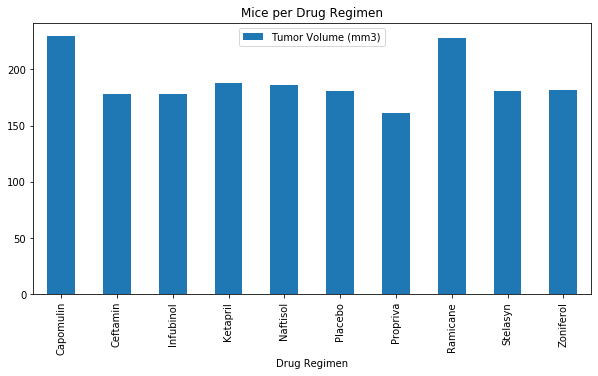

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Use dataframe.plot() in order to create a bar chart of the data
count_per_regimen.plot(kind="bar", figsize=(10,5))

#set title for the chart
plt.title("Mice per Drug Regimen")

plt.show()
plt.tight_layout()

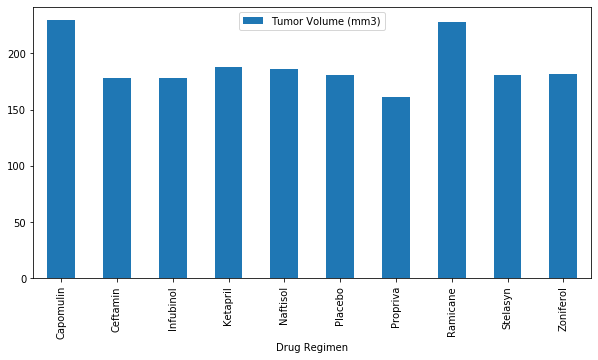

<Figure size 432x288 with 0 Axes>

In [47]:
multi_mice_timepoint_plot = count_per_regimen.plot(kind="bar", figsize=(10,5))

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_mice_timepoint_plot.set_xticklabels(merge_df["Mouse ID"], rotation=45)

#multi_mice_timepoint_plot.set_xticklabels(merge_dfg["Drug Regimen"], rotation=0)

plt.show()
plt.tight_layout()

## Pie Plots
- Generate a pie plot showing the distribution of female versus male mice using pandas
- Generate a pie plot showing the distribution of female versus male mice using pyplot

In [48]:
# Filtering the columns I need to create my pie chart
col_list_two = ['Mouse ID', 'Sex']

m_f_df = merge_df.loc[:,col_list_two]

In [49]:
male_female_dfg = m_f_df.groupby(['Sex'])
m_f_dfg = male_female_dfg.agg(['count'])
m_f_dfg.head()

,Mouse ID
,count
Sex,
Female,935
Male,958


C:\Users\Claudia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


<function matplotlib.pyplot.show(*args, **kw)>

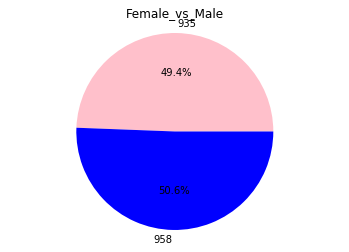

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Female_vs_Male = [935,958]
my_labels = 'Female', 'Male'
colors = ["pink", "blue"]
plt.pie(m_f_dfg, labels = Female_vs_Male, colors=colors, autopct='%1.1f%%')
plt.title('Female_vs_Male')
plt.axis('equal')
plt.show

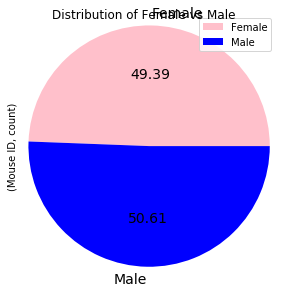

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["pink", "blue"]
pie_plot = m_f_dfg.plot(kind="pie", subplots=True, title=("Distribution of Female vs Male"), colors=colors, autopct='%.2f', fontsize = 14, figsize=(4,4))
#pie_plot.set_ylabel("Sex")

plt.tight_layout()
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Need to sort based on drug regimne and timepoint
top_four_df = merge_df.groupby(["Drug Regimen", "Timepoint"]).mean().reset_index()
last_time_point = top_four_df[top_four_df['Timepoint'] == 45]
last_time_point.sort_values(by='Tumor Volume (mm3)', ascending=True).head(4)

,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
79,Ramicane,45,10.050000,19.300000,34.955595,1.250000
9,Capomulin,45,12.809524,19.857143,36.236114,1.476190
19,Ceftamin,45,13.538462,27.615385,64.132421,2.692308
29,Infubinol,45,18.555556,26.666667,65.755562,2.111111


In [100]:
#pull out data where timepoint is equal to 45 and pull out the drug regimen associated
merge_df_idx = merge_df.set_index('Drug Regimen')
top_four_trials = merge_df_idx.loc[['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']]
top_four_45 = top_four_trials[top_four_trials['Timepoint']==45]

top_four_45.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Ramicane,g791,Male,11,16,45,29.128472,1
Ramicane,s508,Male,1,17,45,30.276232,0
Ramicane,m546,Male,18,16,45,30.564625,1
Ramicane,z578,Male,11,16,45,30.638696,0


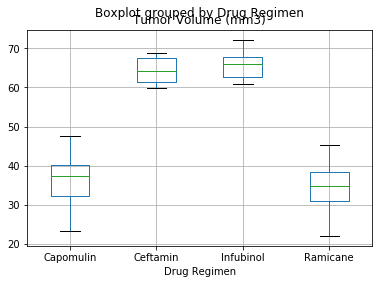

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

top_four_45 = top_four_45.reset_index()
top_four_45.boxplot(by='Drug Regimen', column = 'Tumor Volume (mm3)')

## Line and Scatter Plots

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_two_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_two_df = capomulin_two_df.reset_index()
capomulin_two_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [59]:
cap_mouse_df = capomulin_two_df.loc[capomulin_two_df["Mouse ID"] == "s185"]
cap_mouse_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


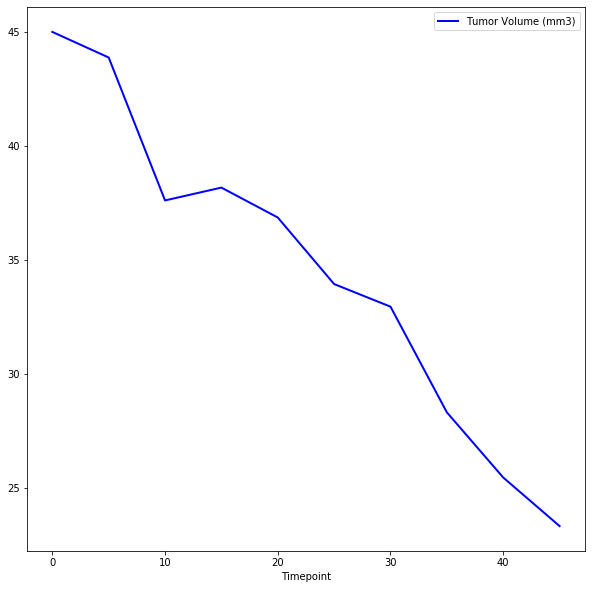

In [60]:
cap_mouse_df = cap_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_mouse_df = cap_mouse_df.reset_index(drop=True)

#Line plot:
cap_mouse_df.set_index('Timepoint').plot(figsize=(10,10), linewidth=2, color='blue')

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_two_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [62]:
# gather mouse id, weight, tumor volume
selected_df = capomulin_two_df.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
selected_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [63]:
cap_avg = pd.DataFrame(selected_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean())
cap_avg = cap_avg.reset_index()
cap_avg.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [64]:
cap_avg = cap_avg.rename(columns={'Tumor Volume (mm3)': 'Average Volume'})
cap_avg.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


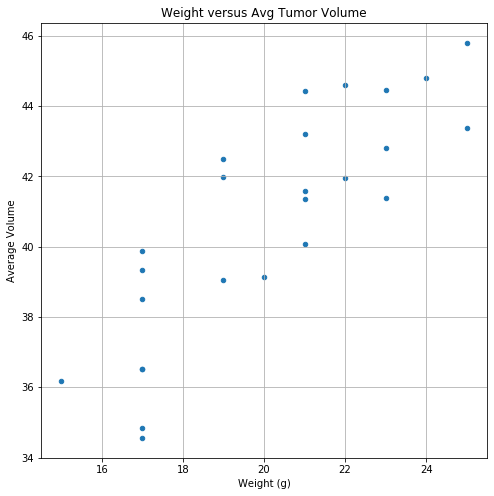

In [65]:
cap_avg.plot(kind="scatter", x ='Weight (g)', y="Average Volume", grid=True, figsize=(8,8), title="Weight versus Avg Tumor Volume")
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
corr_data = cap_avg.loc[:, ['Weight (g)', 'Average Volume']]
corr_matrix = corr_data.corr()
corr_matrix.head()
# for mouse weight and average tumor volume for the Capomulin regimen

,Weight (g),Average Volume
Weight (g),1.000000,0.841936
Average Volume,0.841936,1.000000


The r-squared is: 0.7088568047708717


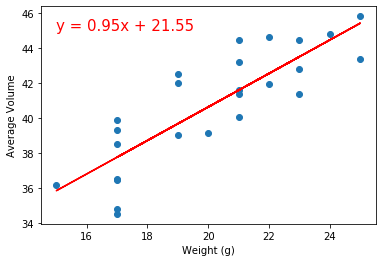

In [74]:
# Print out the r-squared value along with the plot.
x_values = cap_avg['Weight (g)']
y_values = cap_avg[ 'Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#15 is the x-value, 45 is the y-value
plt.text(15, 45, line_eq, fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()